This is a toy example of the use of Mapper algorithm. We will generate two concentric cycles and run the mapper on them. As a filtering function we will select projection to the second coordinate, as a colouring function, projection to the first one. Clustering method will be DBSCAN with some more or less random parameters. 

In [1]:
import kmapper as km
from kmapper import jupyter 
import numpy as np
import sklearn
import matplotlib.pyplot as plt

C:\Users\feliz\Anaconda3\anaconda mejor\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\feliz\Anaconda3\anaconda mejor\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecation

In [2]:
import kmapper as km
from sklearn import datasets
data, labels = datasets.make_circles(n_samples=5000, noise=0.03, factor=0.3)

# Initialize
mapper = km.KeplerMapper(verbose=1)
projected_data = data[:,1]
colouring = data[:,0]

KeplerMapper(verbose=1)


C:\Users\feliz\Anaconda3\anaconda mejor\lib\site-packages\sklearn\feature_extraction\image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):


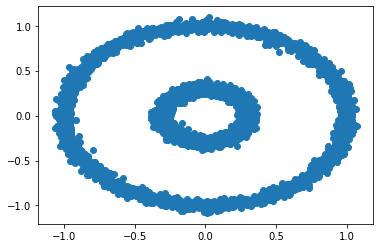

In [3]:
#Here is our dataset:
plot = plt.scatter( data[:,0],data[:,1] )

In [8]:
graph = mapper.map(projected_data,data,
                      clusterer=sklearn.cluster.DBSCAN(eps=0.3, min_samples=15),
                      cover=km.Cover(20, 0.3))

# Visualize it
html = mapper.visualize(graph, path_html="concentric_circles_km.html",color_function=colouring)
                 #title= "make_circles(n_samples=5000, noise=0.03, factor=0.3)")

jupyter.display(path_html="concentric_circles_km.html")

Mapping on data shaped (5000, 2) using lens shaped (5000,)

Creating 20 hypercubes.

Created 46 edges and 46 nodes in 0:00:00.099741.


Exception: 0 `color_function_names` values found, but 1 columns found in color_values. Must be equal.

no display found. Using non-interactive Agg backend


C:\Users\feliz\Anaconda3\anaconda mejor\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
C:\Users\feliz\Anaconda3\anaconda mejor\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


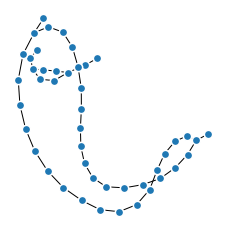

In [6]:
#Here is an alternative way of visualizing the mapper graph with mathplotlib:
km.draw_matplotlib(graph, layout="spring")
plt.show()